In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
intensities = pd.read_csv('/home/aaristov/Multicell/SGR/20200807-CIPRO-7ngml-rep1_1.2_cellsperdrop//intensities.csv')
print (intensities.columns)
table = pd.read_csv('/home/aaristov/Multicell/SGR/20200807-CIPRO-7ngml-rep1_1.2_cellsperdrop/20200807-CIPRO-7ngml_single cell data.csv')
print(table.columns)
positive_labels = table.query('final_state == 1').id

intensities.loc[:, 'time, h'] = intensities.time * .5
intensities.loc[:, 'experiment'] = 'CIPRO'

positive_intensities = intensities[intensities.label.isin(positive_labels) ][intensities.dye == 'RFP']

Index(['time', 'label', 'dye', 'bg', 'raw', 'mean_intensity'], dtype='object')
Index(['coord', 'id', 'ncells', 'final_state', 'clumping', 'phenotype',
       'Unnamed: 6', 'comment', 'Unnamed: 8', 'Unnamed: 9', 'legend'],
      dtype='object')


<ipython-input-3-da6382ed8cdf>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_intensities = intensities[intensities.label.isin(positive_labels) ][intensities.dye == 'RFP']


In [4]:
control = pd.read_csv('/home/aaristov/Multicell/SGR/20200805-Control_1.2cellsperdrop/0805-control/intensities.csv')
control_table = pd.read_csv('/home/aaristov/Multicell/SGR/20200805-Control_1.2cellsperdrop/0805-control/202008Control_confocal.csv')
print(control_table.columns)
positive_labels = control_table.query('No_cells > 0')['Andrey ID']

control.loc[:, 'time, h'] = control.time * .5
control.loc[:, 'experiment'] = 'control'
positive_control = control[control.label.isin(positive_labels) ]

Index(['Salome ID', 'Andrey ID', 'No_cells', 'Final state', 'Clumping',
       'Notes', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')


<ipython-input-5-541def5e97b2>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=pd.concat((positive_control, positive_intensities[intensities.dye == 'RFP'])), hue='experiment', **params)


(0.0, 16.0)

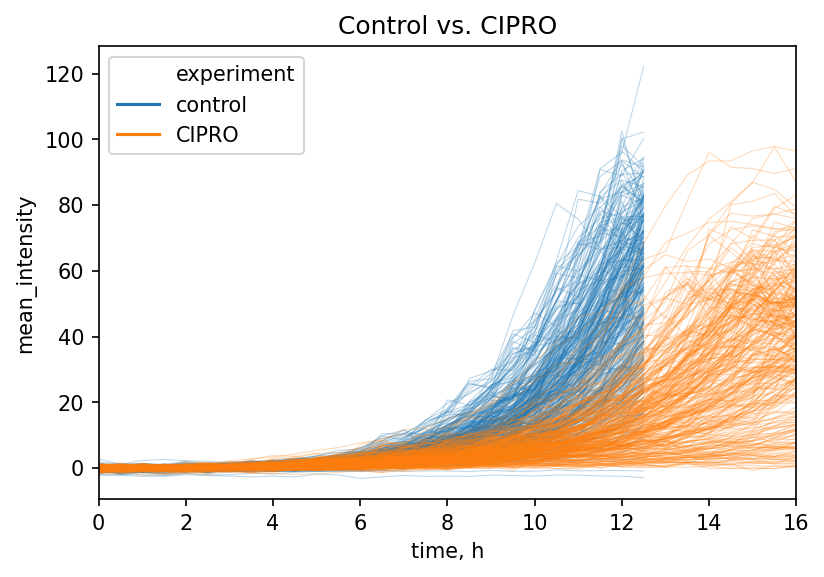

In [5]:
plt.figure(dpi=150)

params = dict(
    x='time, h', 
    y='mean_intensity',
    units='label', estimator=None, ci=None, alpha=.3, lw=.5
)

# sns.lineplot(data=control, label='control', **params)
sns.lineplot(data=pd.concat((positive_control, positive_intensities[intensities.dye == 'RFP'])), hue='experiment', **params)
plt.title('Control vs. CIPRO')
plt.xlim(0, 16)

In [6]:
plt.figure(dpi=150)
sns.lineplot(data=positive_control, **params)
plt.title('Control')


Text(0.5, 1.0, 'Control')

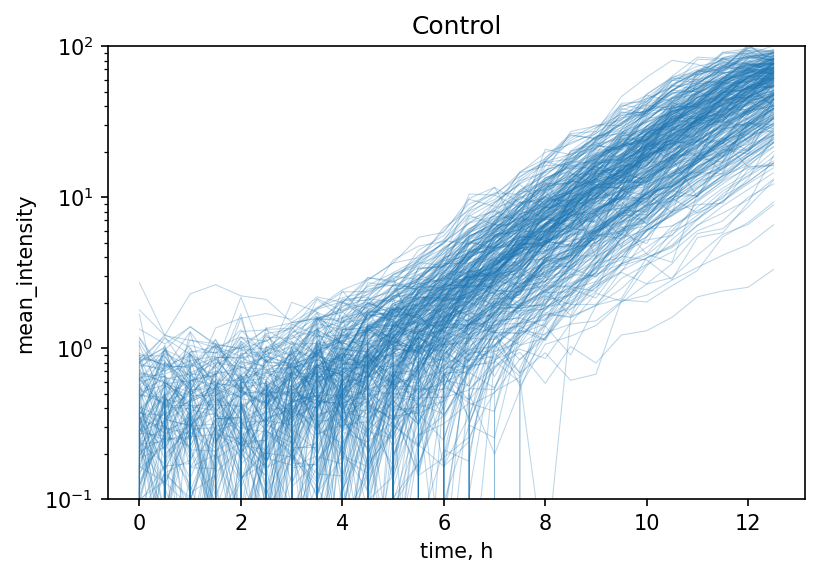

In [11]:
plt.figure(dpi=150)
sns.lineplot(data=positive_control, **params)
plt.title('Control')
plt.ylim(1e-1, 1e2)

plt.semilogy([0, 0])

(0.0, 16.0)

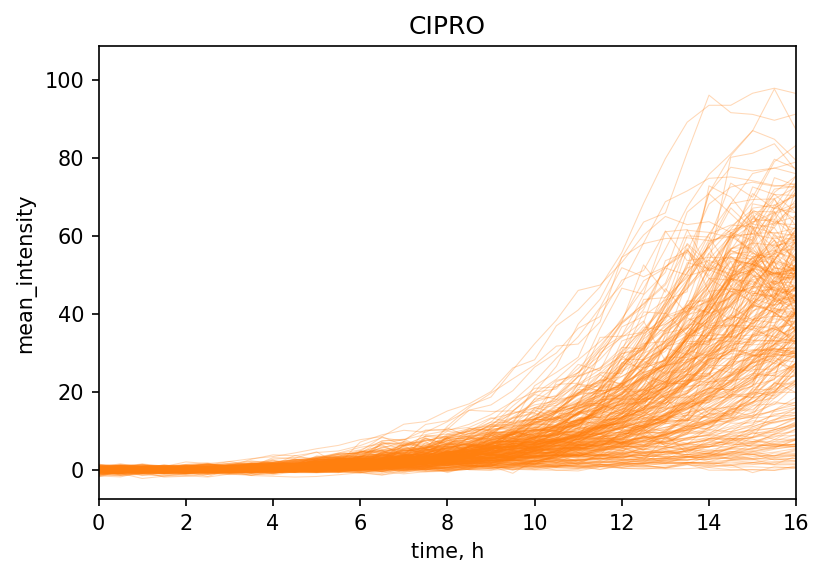

In [8]:
plt.figure(dpi=150)
sns.lineplot(data=positive_intensities, color='tab:orange', **params)
plt.title('CIPRO')
plt.xlim(0, 16)

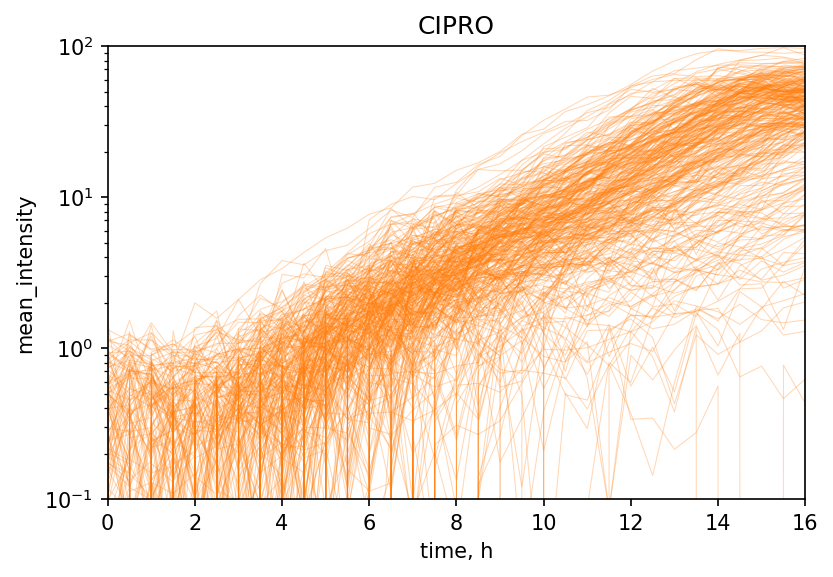

In [10]:
plt.figure(dpi=150)
sns.lineplot(data=positive_intensities, color='tab:orange', **params)
plt.title('CIPRO')
plt.xlim(0, 16)
plt.ylim(1e-1, 1e2)
plt.semilogy([0, 0])